In [819]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import sklearn.metrics as metrics
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from itertools import combinations
from sklearn import preprocessing as pp
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [820]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Customer-Segmentation/master/Train_aBjfeNk%20-%20Train_aBjfeNk.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Customer-Segmentation/master/Test_LqhgPWU%20-%20Test_LqhgPWU.csv')
#Reading sample submission file:
sample_sub = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Customer-Segmentation/master/sample_submission_wyi0h0z%20-%20sample_submission_wyi0h0z.csv')

In [821]:
sc=StandardScaler()
mm=MinMaxScaler(feature_range=(1,4), copy=True)
ohe = OneHotEncoder(sparse=False)
le=LabelEncoder()

In [822]:
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [823]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [824]:
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [825]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [826]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(7)

,Total,Percent
Work_Experience,829,0.102752
Family_Size,335,0.041522
Ever_Married,140,0.017353
Profession,124,0.015369
Graduated,78,0.009668
Var_1,76,0.009420
Segmentation,0,0.000000


In [827]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(7)

,Total,Percent
Work_Experience,269,0.102398
Family_Size,113,0.043015
Ever_Married,50,0.019033
Profession,38,0.014465
Var_1,32,0.012181
Graduated,24,0.009136
Spending_Score,0,0.000000


In [828]:
# fill up missing values with mode
train['Ever_Married'] = train['Ever_Married'].fillna('Yes')
test['Ever_Married'] = test['Ever_Married'].fillna('Yes')

train['Var_1'] = train['Var_1'].fillna('Cat_6')
test['Var_1'] = test['Var_1'].fillna('Cat_6')

train['Profession'] = train['Profession'].fillna('Healthcare')
test['Profession'] = test['Profession'].fillna('Healthcare')

train['Graduated'] = train['Graduated'].fillna('No')
test['Graduated'] = test['Graduated'].fillna('No')

#fill up missing values with median
train['Work_Experience'] = train['Work_Experience'].fillna(train['Work_Experience'].median())
test['Work_Experience'] = test['Work_Experience'].fillna(train['Work_Experience'].median())

train['Family_Size'] = train['Family_Size'].fillna(4)
test['Family_Size'] = test['Family_Size'].fillna(4)

In [829]:
#remove unnecessary characters
train['Var_1'] = train['Var_1'].map(lambda x: x.lstrip('Cat_'))
test['Var_1'] = test['Var_1'].map(lambda x: x.lstrip('Cat_'))

In [830]:
#convert columns to integer
train.Work_Experience=train.Work_Experience.astype(int)
test.Work_Experience=test.Work_Experience.astype(int)

train.Family_Size=train.Family_Size.astype(int)
test.Family_Size=test.Family_Size.astype(int)

train.Var_1=train.Var_1.astype(int)
test.Var_1=test.Var_1.astype(int)

In [831]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [832]:
segment=train.groupby('Segmentation').sum().reset_index()
segment

,Segmentation,ID,Age,Work_Experience,Family_Size,Var_1
0,A,913938965,88592,5305,4959,10042
1,B,861220631,89556,4154,5067,9595
2,C,913244806,96814,4222,5905,10643
3,D,1050945901,75729,6271,7449,11249


In [833]:
le_s=LabelEncoder()
train.Segmentation=le_s.fit_transform(train.Segmentation)

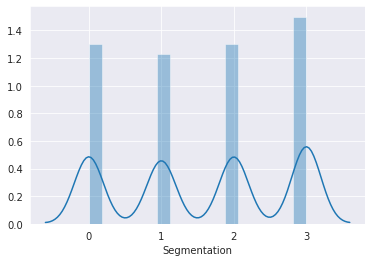

In [834]:
sns.distplot(train['Segmentation'])

In [835]:
segment1=train.groupby('Segmentation').sum().reset_index()
segment1

,Segmentation,ID,Age,Work_Experience,Family_Size,Var_1
0,0,913938965,88592,5305,4959,10042
1,1,861220631,89556,4154,5067,9595
2,2,913244806,96814,4222,5905,10643
3,3,1050945901,75729,6271,7449,11249


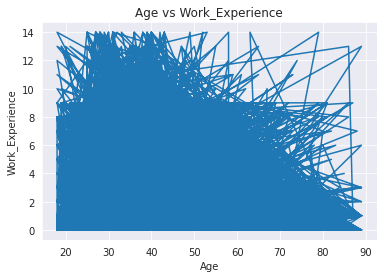

In [836]:
plt.plot(train.Age, train.Work_Experience)
plt.title('Age vs Work_Experience')
plt.xlabel('Age')
plt.ylabel('Work_Experience')
plt.show()

In [837]:
sex=train.groupby('Gender')['Segmentation'].sum().reset_index()
sex

,Gender,Segmentation
0,Female,5582
1,Male,7020


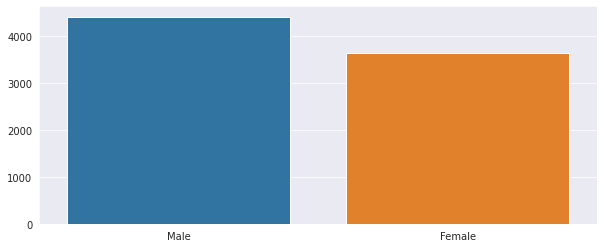

In [838]:
genders = train.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [839]:
train.Gender=le.fit_transform(train.Gender)
test.Gender=le.fit_transform(test.Gender)

In [840]:
married=train.groupby('Ever_Married')['Segmentation'].sum().reset_index()
married

,Ever_Married,Segmentation
0,No,6096
1,Yes,6506


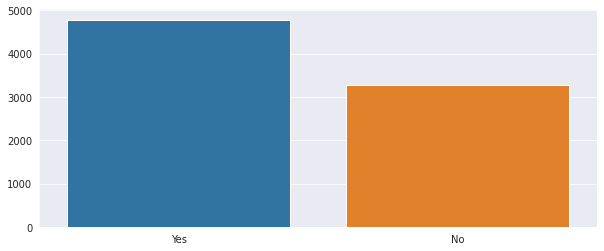

In [841]:
wed = train.Ever_Married.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=wed.index, y=wed.values)
plt.show()

In [842]:
train.Ever_Married=le.fit_transform(train.Ever_Married)
test.Ever_Married=le.fit_transform(test.Ever_Married)

In [843]:
married1=train.groupby('Ever_Married')['Segmentation'].sum().reset_index()
married1

,Ever_Married,Segmentation
0,0,6096
1,1,6506


In [844]:
age=train.groupby('Age')['Segmentation'].sum().reset_index()
age

,Age,Segmentation
0,18,376
1,19,371
2,20,353
3,21,324
4,22,394
...,...,...
62,85,34
63,86,37
64,87,25
65,88,50


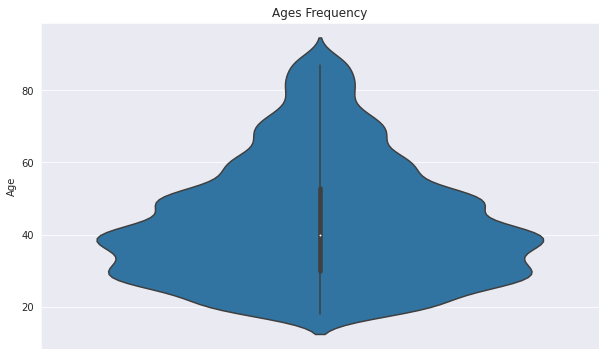

In [845]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Age"])
plt.show()

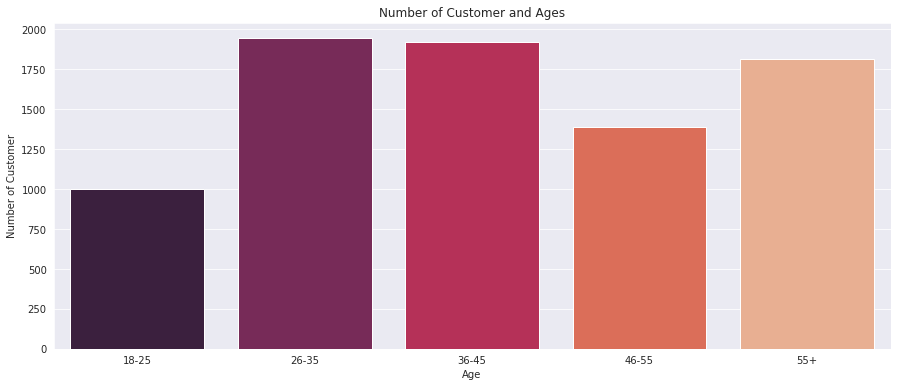

In [846]:
age18_25 = train.Age[(train.Age <= 25) & (train.Age >= 18)]
age26_35 = train.Age[(train.Age <= 35) & (train.Age >= 26)]
age36_45 = train.Age[(train.Age <= 45) & (train.Age >= 36)]
age46_55 = train.Age[(train.Age <= 55) & (train.Age >= 46)]
age55above = train.Age[train.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


In [847]:
graduate=train.groupby('Graduated')['Segmentation'].sum().reset_index()
graduate

,Graduated,Segmentation
0,No,5626
1,Yes,6976


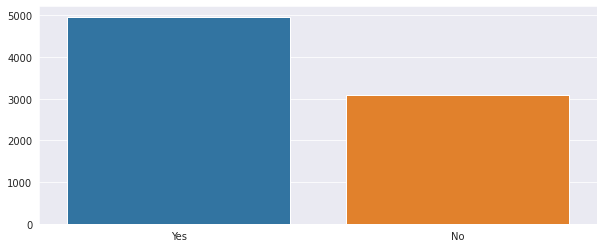

In [848]:
grad = train.Graduated.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=grad.index, y=grad.values)
plt.show()

In [849]:
train.Graduated=le.fit_transform(train.Graduated)
test.Graduated=le.fit_transform(test.Graduated)

In [850]:
graduate1=train.groupby('Graduated')['Segmentation'].sum().reset_index()
graduate1

,Graduated,Segmentation
0,0,5626
1,1,6976


In [851]:
job=train.groupby('Profession')['Segmentation'].sum().reset_index()
job

,Profession,Segmentation
0,Artist,3297
1,Doctor,1041
2,Engineer,867
3,Entertainment,1162
4,Executive,881
5,Healthcare,3541
6,Homemaker,381
7,Lawyer,822
8,Marketing,610


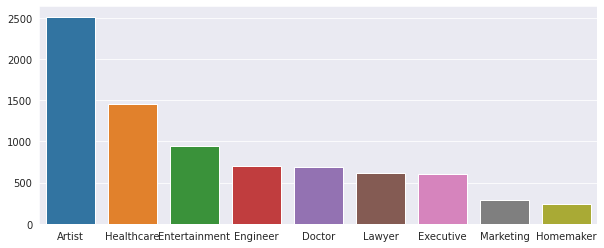

In [852]:
prof = train.Profession.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=prof.index, y=prof.values)
plt.show()

In [853]:
train.Profession=le.fit_transform(train.Profession)
test.Profession=le.fit_transform(test.Profession)

In [854]:
work=train.groupby('Work_Experience')['Segmentation'].sum().reset_index()
work

,Work_Experience,Segmentation
0,0,3593
1,1,4924
2,2,472
3,3,408
4,4,401
5,5,303
6,6,328
7,7,302
8,8,767
9,9,733


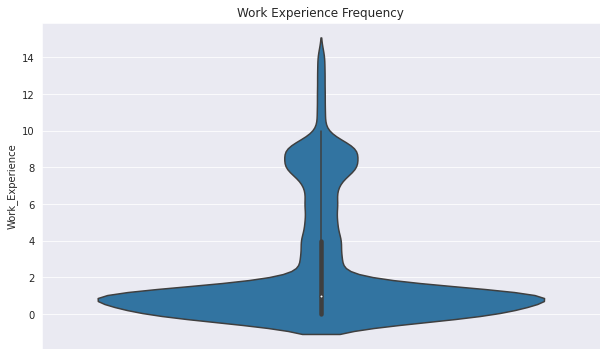

In [855]:
plt.figure(figsize=(10,6))
plt.title("Work Experience Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Work_Experience"])
plt.show()

In [856]:
spend=train.groupby('Spending_Score')['Segmentation'].sum().reset_index()
spend

,Spending_Score,Segmentation
0,Average,2810
1,High,1662
2,Low,8130


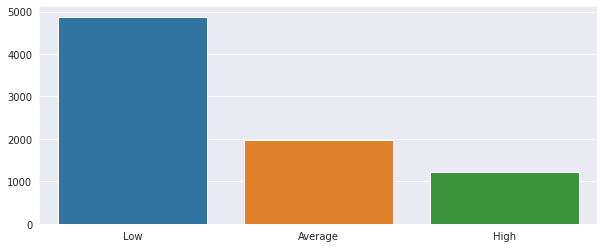

In [857]:
score = train.Spending_Score.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=score.index, y=score.values)
plt.show()

In [858]:
train.Spending_Score=le.fit_transform(train.Spending_Score)
test.Spending_Score=le.fit_transform(test.Spending_Score)

In [859]:
family=train.groupby('Family_Size')['Segmentation'].sum().reset_index()
family

,Family_Size,Segmentation
0,1,1810
1,2,3291
2,3,2490
3,4,3077
4,5,1170
5,6,410
6,7,168
7,8,106
8,9,80


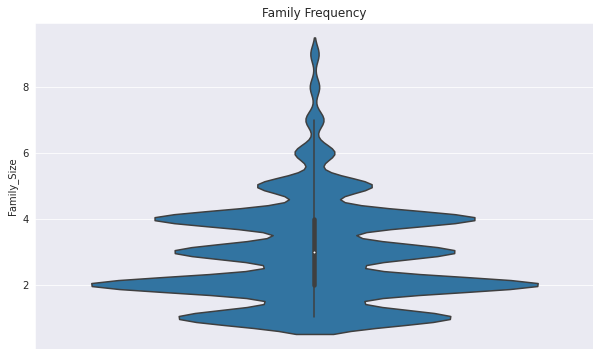

In [860]:
plt.figure(figsize=(10,6))
plt.title("Family Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Family_Size"])
plt.show()

In [861]:
var=train.groupby('Var_1')['Segmentation'].sum().reset_index()
var

,Var_1,Segmentation
0,1,228
1,2,706
2,3,1271
3,4,1695
4,5,140
5,6,8239
6,7,323


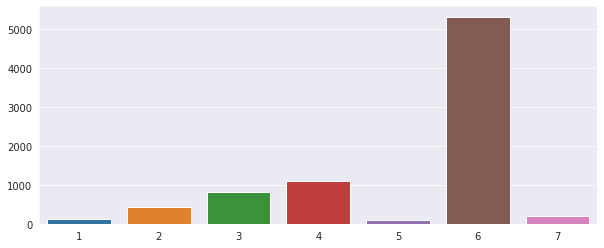

In [862]:
var = train.Var_1.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=var.index, y=var.values)
plt.show()

In [863]:
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1,2,4,4,3
1,462643,0,1,38,1,2,1,0,3,4,0
2,466315,0,1,67,1,2,1,2,1,6,1
3,461735,1,1,67,1,7,0,1,2,6,1
4,462669,0,1,40,1,3,1,1,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,5,0,2,7,1,3
8064,464685,1,0,35,0,4,3,2,4,4,3
8065,465406,0,0,33,1,5,1,2,1,6,3
8066,467299,0,0,27,1,5,1,2,4,6,1


In [864]:
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,0,1,36,1,2,0,2,1,6
1,458994,1,1,37,1,5,8,0,4,6
2,458996,0,1,69,0,5,0,2,1,6
3,459000,1,1,59,0,4,11,1,2,6
4,459001,0,0,19,0,8,1,2,4,6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,1,0,29,0,5,9,2,4,6
2623,467958,0,0,35,1,1,1,2,1,6
2624,467960,0,0,53,1,3,1,2,2,6
2625,467961,1,1,47,1,4,1,1,5,4


In [865]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               8068 non-null   int64
 1   Gender           8068 non-null   int64
 2   Ever_Married     8068 non-null   int64
 3   Age              8068 non-null   int64
 4   Graduated        8068 non-null   int64
 5   Profession       8068 non-null   int64
 6   Work_Experience  8068 non-null   int64
 7   Spending_Score   8068 non-null   int64
 8   Family_Size      8068 non-null   int64
 9   Var_1            8068 non-null   int64
 10  Segmentation     8068 non-null   int64
dtypes: int64(11)
memory usage: 693.5 KB


In [866]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2627 non-null   int64
 1   Gender           2627 non-null   int64
 2   Ever_Married     2627 non-null   int64
 3   Age              2627 non-null   int64
 4   Graduated        2627 non-null   int64
 5   Profession       2627 non-null   int64
 6   Work_Experience  2627 non-null   int64
 7   Spending_Score   2627 non-null   int64
 8   Family_Size      2627 non-null   int64
 9   Var_1            2627 non-null   int64
dtypes: int64(10)
memory usage: 205.4 KB


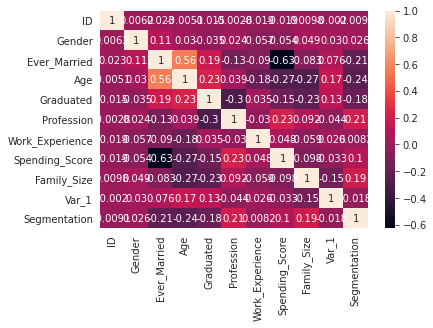

In [867]:
#create a heatmap to correlate promotion
plt.figure(figsize=(6,4))
cmap=train.corr()
sns.heatmap(cmap, annot=True)

In [868]:
#set up features
features=['Gender', 'Age', 'Ever_Married','Graduated', 'Profession',
          'Spending_Score', 'Family_Size','Var_1' ]
#set up target variable
train_labels = np.array(train.Segmentation.values.reshape(-1, 1))

In [869]:
#prepare data
y = train_labels
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [870]:
#split train set for testing
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.15, random_state=1)
#bring all features to the same range
#sc_X=StandardScaler()
#X_train=sc_X.fit_transform(X_train)
#X_validation=sc_X.transform(X_validation)

In [871]:
# random forest
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, Y_train)
# predict on test set
rfc_pred = rfc.predict(X_validation)
# scoring
accuracy_score(Y_validation, rfc_pred), f1_score(Y_validation, rfc_pred, average='weighted'), recall_score(Y_validation, rfc_pred, average='weighted')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.47811725846407926, 0.48029607016654735, 0.47811725846407926)

In [872]:
#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = rfc.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [873]:
# f1 score and recall score
f1_score(Y_validation, rfc_pred, average='weighted'), recall_score(Y_validation, rfc_pred, average='weighted')

(0.48029607016654735, 0.47811725846407926)

In [874]:
#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(Y_validation, rfc_pred)

array([[127,  77,  52,  38],
       [ 75,  82,  81,  31],
       [ 43,  70, 161,  35],
       [ 75,  37,  18, 209]])

In [875]:
#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(Y_validation, rfc_pred))
#Create DataFrame from confmtrx array 
#rows for test: Male, Female, Infant designation as index 
#columns for preds: male, predicted_female, predicted_infant as column
pd.DataFrame(confmtrx, index=['A','B', 'C', 'D'],
columns=['predicted_A', 'predicted_B', 'predicted_C', 'predicted_D'])

,predicted_A,predicted_B,predicted_C,predicted_D
A,127,77,52,38
B,75,82,81,31
C,43,70,161,35
D,75,37,18,209


In [876]:
#Accuracy statistics
print('Accuracy Score:', metrics.accuracy_score(Y_validation, rfc_pred))  
#Create classification report
class_report=classification_report(Y_validation, rfc_pred)
print(class_report)

Accuracy Score: 0.47811725846407926
              precision    recall  f1-score   support

           0       0.40      0.43      0.41       294
           1       0.31      0.30      0.31       269
           2       0.52      0.52      0.52       309
           3       0.67      0.62      0.64       339

    accuracy                           0.48      1211
   macro avg       0.47      0.47      0.47      1211
weighted avg       0.48      0.48      0.48      1211



In [877]:
y_pred=rfc.predict(X_validation)
y_pred

array([1, 0, 1, ..., 0, 2, 2])

In [878]:
#Accuracy statistics
print('Accuracy Score:', metrics.accuracy_score(Y_validation, y_pred))  

Accuracy Score: 0.47811725846407926


In [879]:
Y_validation=Y_validation.flatten()
y_pred=y_pred.flatten()

df=pd.DataFrame({'Actual': Y_validation, 'Predicted':y_pred})
df

,Actual,Predicted
0,2,1
1,3,0
2,0,1
3,3,3
4,0,0
...,...,...
1206,3,3
1207,3,0
1208,0,0
1209,2,2


In [880]:
predictions = rfc.predict(X_test)
predictions=predictions.astype(int)
predictions

array([0, 1, 0, ..., 0, 1, 2])

In [881]:
predictions=le_s.inverse_transform(predictions)

In [882]:
output = pd.DataFrame({'ID': test.ID, 'Segmentation': predictions})
output

,ID,Segmentation
0,458989,A
1,458994,B
2,458996,A
3,459000,C
4,459001,D
...,...,...
2622,467954,D
2623,467958,A
2624,467960,A
2625,467961,B


In [883]:
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [884]:
#upload submission
my_submission = pd.read_csv("my_submission.csv")
my_submission

,ID,Segmentation
0,458989,A
1,458994,B
2,458996,A
3,459000,C
4,459001,D
...,...,...
2622,467954,D
2623,467958,A
2624,467960,A
2625,467961,B
